## Mask man

In [1]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9AEB-3250

 C:\Users\seonwook\Documents\ds_study\source_code\DL 디렉터리

2021-12-15  오후 01:43    <DIR>          .
2021-12-15  오후 01:43    <DIR>          ..
2021-12-15  오후 01:08    <DIR>          .ipynb_checkpoints
2021-12-08  오후 06:09           596,698 Beginning of DeepLearning - XOR.ipynb
2021-12-07  오후 03:26           649,120 Beginning of DeepLearning.ipynb
2021-12-13  오후 05:55            99,303 CNN.ipynb
2021-12-15  오후 01:30    <DIR>          data
2021-12-15  오전 11:41           578,815 Deep Learning from scratch.ipynb
2021-12-15  오후 01:06           199,496 dive to cnn.ipynb
2021-12-06  오후 09:18            62,960 Good Books recommendations.ipynb
2021-12-15  오후 01:43            20,269 Mask man.ipynb
2021-12-07  오후 08:26        37,920,176 MNIST_CNN_model.h5
2021-12-14  오후 12:53    <DIR>          OpenCV
2021-12-07  오후 11:11    <DIR>          project
2021-12-06  오후 05:58            87,278 Recommendations 추천시스템 - 이론, 영화 추천.ipynb
2021-12-06  오후 06:39        

In [2]:
ls "./data/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9AEB-3250

 C:\Users\seonwook\Documents\ds_study\source_code\DL\data 디렉터리

2021-12-15  오후 01:30    <DIR>          .
2021-12-15  오후 01:30    <DIR>          ..
2021-12-15  오후 01:13       346,345,728 archive.zip
2021-12-15  오후 01:30    <DIR>          Face Mask Dataset
               1개 파일         346,345,728 바이트
               3개 디렉터리  808,529,104,896 바이트 남음


### 파이썬도 압축파일을 관리하는 툴이 있다

In [7]:
# import zipfile

# content_zip = zipfile.ZipFile("./data/archive.zip")
# content_zip.extractall("./data")

# content_zip.close()

In [3]:
ls "./data/Face Mask Dataset/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9AEB-3250

 C:\Users\seonwook\Documents\ds_study\source_code\DL\data\Face Mask Dataset 디렉터리

2021-12-15  오후 01:30    <DIR>          .
2021-12-15  오후 01:30    <DIR>          ..
2021-12-15  오후 01:30    <DIR>          Test
2021-12-15  오후 01:30    <DIR>          Train
2021-12-15  오후 01:30    <DIR>          Validation
               0개 파일                   0 바이트
               5개 디렉터리  808,528,285,696 바이트 남음


### 모듈 설치

In [4]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
ls "./data/Face Mask Dataset/Train"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9AEB-3250

 C:\Users\seonwook\Documents\ds_study\source_code\DL\data\Face Mask Dataset\Train 디렉터리

2021-12-15  오후 01:30    <DIR>          .
2021-12-15  오후 01:30    <DIR>          ..
2021-12-15  오후 01:30    <DIR>          WithMask
2021-12-15  오후 01:30    <DIR>          WithoutMask
               0개 파일                   0 바이트
               4개 디렉터리  808,526,032,896 바이트 남음


### 생소할 수 있지만 파일을 이렇게 정리하기도 한다

In [6]:
path = "./data/Face Mask Dataset/"
dataset = {"image_path": [], "mask_status": [], "where": []}

for where in os.listdir(path):   # where는 train, test, validation
    for status in os.listdir(path + "/" + where):    # withmask, withoutmask
        for image in glob.glob(path + where + "/" + status + "/" + "*.png"):
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)

### 경로와 목록의 정리

In [7]:
dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,./data/Face Mask Dataset/Test/WithMask\1163.png,WithMask,Test
1,./data/Face Mask Dataset/Test/WithMask\1174.png,WithMask,Test
2,./data/Face Mask Dataset/Test/WithMask\1175.png,WithMask,Test
3,./data/Face Mask Dataset/Test/WithMask\1203.png,WithMask,Test
4,./data/Face Mask Dataset/Test/WithMask\1361.png,WithMask,Test


With Mask: 5909
Without Mask: 5883


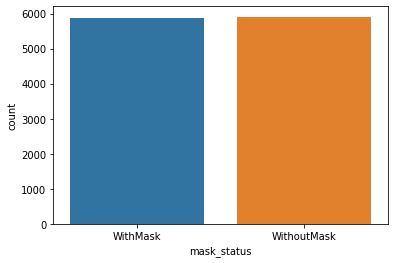

In [8]:
print('With Mask:', dataset.value_counts('mask_status')[0])
print('Without Mask:', dataset.value_counts('mask_status')[1])

sns.countplot(x=dataset['mask_status']);

### 랜덤하게 어떤 그림들이 있는지 확인

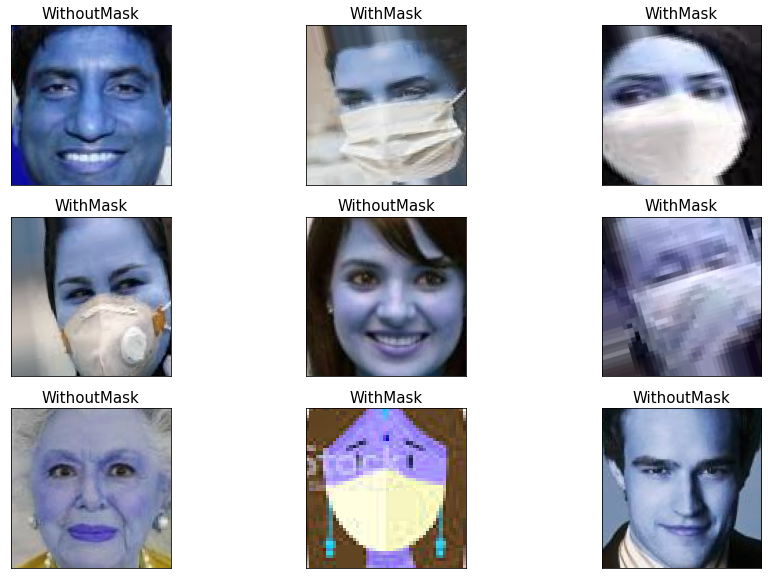

In [11]:
import cv2

plt.figure(figsize=(15, 10))
for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.imread(dataset.loc[random, 'image_path']))
    plt.title(dataset.loc[random, 'mask_status'], size=15)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

### Train / test / validation으로 나눌 필요가 없다. (이미 되어있음)

In [12]:
train_df = dataset[dataset['where'] == 'Train']
test_df = dataset[dataset['where'] == 'Test'] 
valid_df = dataset[dataset['where'] == 'Validation'] 

train_df.head()

,image_path,mask_status,where
992,./data/Face Mask Dataset/Train/WithMask\10.png,WithMask,Train
993,./data/Face Mask Dataset/Train/WithMask\100.png,WithMask,Train
994,./data/Face Mask Dataset/Train/WithMask\1004.png,WithMask,Train
995,./data/Face Mask Dataset/Train/WithMask\1005.png,WithMask,Train
996,./data/Face Mask Dataset/Train/WithMask\1006.png,WithMask,Train


### Train / test / validation 데이터의 분포 확인

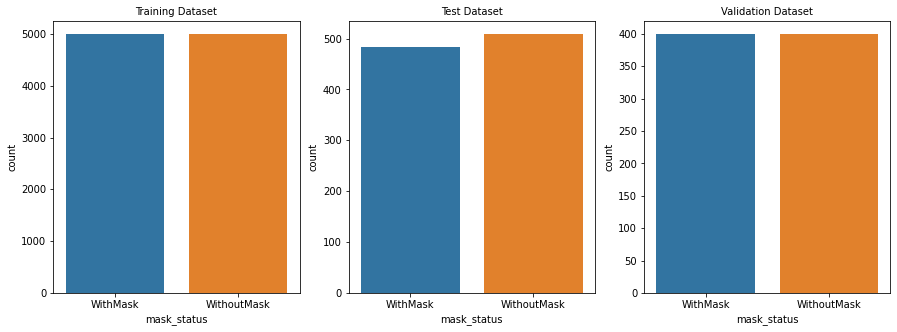

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x=train_df['mask_status'])
plt.title('Training Dataset', size=10)

plt.subplot(1, 3, 2)
sns.countplot(x=test_df['mask_status'])
plt.title('Test Dataset', size=10)

plt.subplot(1, 3, 3)
sns.countplot(x=valid_df['mask_status'])
plt.title('Validation Dataset', size=10)

plt.show()

### Index를 다시 정리

In [14]:
train_df = train_df.reset_index().drop('index', axis=1)
train_df.head()

,image_path,mask_status,where
0,./data/Face Mask Dataset/Train/WithMask\10.png,WithMask,Train
1,./data/Face Mask Dataset/Train/WithMask\100.png,WithMask,Train
2,./data/Face Mask Dataset/Train/WithMask\1004.png,WithMask,Train
3,./data/Face Mask Dataset/Train/WithMask\1005.png,WithMask,Train
4,./data/Face Mask Dataset/Train/WithMask\1006.png,WithMask,Train


### 데이터 전처리

In [15]:
data = []
image_size = 150

for i in range(len(train_df)):
    # Converting the image into grayscale
    img_array = cv2.imread(train_df['image_path'][i], cv2.IMREAD_GRAYSCALE)
    
    # Resizing the array
    new_image_array = cv2.resize(img_array, (image_size, image_size))
    
    # Encoding the image with the label
    if train_df['mask_status'][i] == 'WithMask':
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])

In [16]:
data[0]

[array([[238, 238, 238, ..., 199, 199, 199],
        [238, 238, 238, ..., 197, 197, 197],
        [237, 237, 238, ..., 194, 194, 195],
        ...,
        [236, 236, 236, ..., 151, 151, 152],
        [235, 235, 235, ..., 151, 152, 152],
        [235, 235, 235, ..., 151, 152, 152]], dtype=uint8),
 1]

In [19]:
np.random.shuffle(data)

In [20]:
data[0]

[array([[17, 17, 16, ..., 17, 17, 17],
        [17, 17, 17, ..., 17, 17, 17],
        [17, 17, 16, ..., 17, 17, 17],
        ...,
        [73, 76, 81, ..., 18, 18, 18],
        [75, 76, 79, ..., 17, 18, 19],
        [76, 76, 77, ..., 16, 17, 18]], dtype=uint8),
 0]

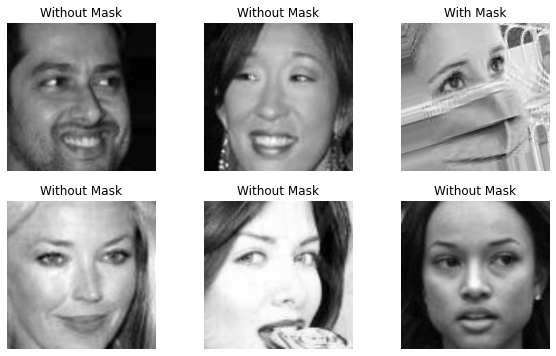

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

for row in range(2):
    for col in range(3):
        image_index = row * 100 + col
        
        ax[row, col].axis('off')
        ax[row, col].imshow(data[image_index][0], cmap='gray')
        
        if data[image_index][1] == 0:
            ax[row, col].set_title('Without Mask')
        else:
            ax[row, col].set_title('With Mask')

### X,y 데이터로 저장하고

In [22]:
X = []
y = []

for image in data:
    X.append(image[0])
    y.append(image[1])
    
X = np.array(X)
y = np.array(y)

### train 데이터만 사용하기로 했기 때문에 데이터를 다시 나눔

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

### Modeling

In [25]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 padding='same', activation='relu',
                 input_shape=(150, 150, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid') # 출력이 0~1 -> Label이 mask를 썼는지, 안썼는지
])

In [26]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)
history = model.fit(X_train, y_train, epochs=4, batch_size=32)

Epoch 1/4
250/250 [==============================] - 121s 482ms/step - loss: 40.6774 - accuracy: 0.8784
Epoch 2/4
250/250 [==============================] - 123s 494ms/step - loss: 0.0772 - accuracy: 0.9732
Epoch 3/4
250/250 [==============================] - 125s 500ms/step - loss: 0.0461 - accuracy: 0.9829
Epoch 4/4
250/250 [==============================] - 118s 474ms/step - loss: 0.0268 - accuracy: 0.9893


### Validation accuracy

In [28]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 6s 90ms/step - loss: 0.1122 - accuracy: 0.9695


[0.11224330216646194, 0.9695000052452087]

### 상대적으로 0에 대한 recall이 조금 떨어짐

In [29]:
prediction = (model.predict(X_val) > 0.5).astype('int32')

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1006
           1       0.98      0.96      0.97       994

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[984  22]
 [ 39 955]]


### 틀린 것 

In [30]:
wrong_result = []

for n in range(0, len(y_val)):
    if prediction[n] != y_val[n]:
        wrong_result.append(n)
        
len(wrong_result)

61

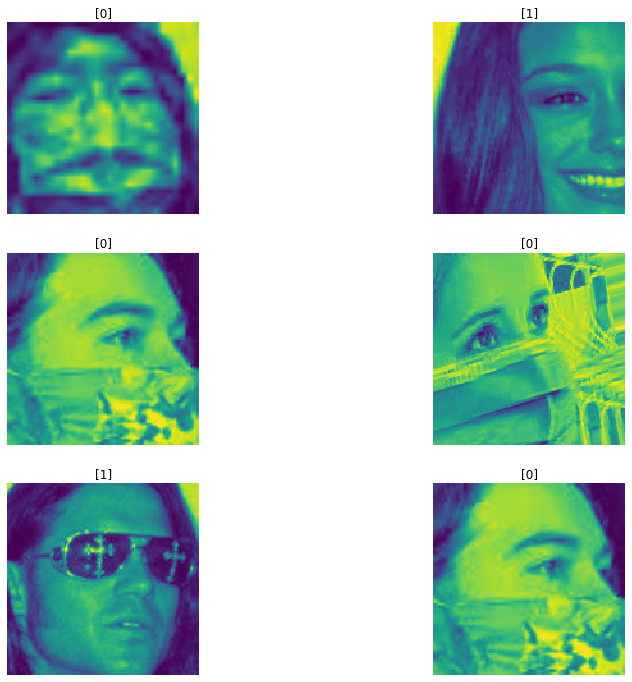

In [34]:
import random

samples = random.choices(population=wrong_result, k=6)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(3, 2, idx + 1)
    plt.imshow(X_val[n].reshape(150, 150), interpolation='nearest')
    plt.title(prediction[n])
    plt.axis('off')
    
plt.show()